# **AISaturdays NN Challenge**

Everyone welcome to this week's challenge. This time we will detect cases of cardiovascular disease through the analysis of electrocardiograms of the heartbeat.


**In this exercise you will:**
- Understand and run NoteBooks with Python.
- Be able to use Python functions and additional libraries.
-Dataset:
  - Get the dataset and preview the dataset information.
  - Clean and normalize the dataset information.
  - Represent and analyze dataset information.
- Apply a NN model.
- Improve the prediction by optimizing the model.

This exercise is based on this [paper](https://arxiv.org/pdf/1805.00794.pdf) that solves the problem we are facing. Take it as a source of inspiration.

Let's go!

## Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data analysis

We are going to see two different ways of importing data in Google Colab:


1.   By uploading the file from your local disk: less recomended since it takes a lot of time if the file to upload is heavy
2.   By giving Colab access to your drive and taking the file from there: more recommened since it is faster.


In [ ]:
#1st WAY: This import allows us to load data from our local machine. NOT RECOMMENDED
from google.colab import files 
files.upload()

data = pd.read_csv('mitbih_train.csv', header=None)

FileNotFoundError: ignored

In [ ]:
#2nd WAY: This import allows us to take data from our drive folder: RECOMMENDED

!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#Now, go to your Drive and get the shareable link of the data you want to use
link = 'https://drive.google.com/file/d/16xNzdtAgnudJ2NXQydRHsXrQTyqcVNVg/view?usp=sharing'
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('train_data.csv') 
 
data = pd.read_csv('train_data.csv', header = None)

How big is the dataset?

In [ ]:
data.shape

(87554, 188)

Let's see how many columns are in the dataset. Show the first five rows

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This is today's dataset. This time, each column represents an electrocardiogram reading (collected at 125Hz). If in total there are 187 readings, in these columns we have about a second and a half of keystrokes. **The last column contains the category to which these keystrokes belong**. In total there are five, each represented by a number:

- Normal: 0
- Premature arrhythmia (atrial, aberrant-atrial, nodal or supra-ventricular) : 1
- Ventricular premature contraction or ventricular escape: 2
- Fusion of ventricular and normal contraction: 3
- Resuscitation, fusion of normal and resuscitation or unclassifiable: 4


Provide a summary statistics of the dataset

In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


Let's have a look at how this electrocardiograms look like. Show one row data in a line chart

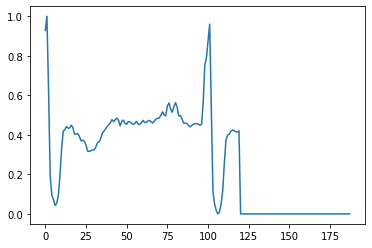

In [ ]:
plt.plot(data.iloc[5])

Now that we've visualized our data, let's work with it. First we have to divide them between input and output.

Divide the dataset into two: one part containing all the columns with electrocardiogram data and another with the labels. Converting the dataset to a Numpy array makes it easier because you can use slicing.

In [ ]:
M = data.values
X = data.iloc[:,0:187].values
y = data.iloc[:,187].values

Create arrays with the indices of the examples that belong to each category. The [np.argwhere](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argwhere.html) function comes in handy here.

In [ ]:
C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()

How many examples are for each category? Try to get that in 4 lines of code

In [ ]:
u = {'N': C0, 'S': C1, 'V': C2, 'F': C3, 'Q': C4}

www = []
for k in u:
    print('There are {} points of the category {}'.format(len(u[k]), k))
    www.append(len(u[k]))

There are 72471 points of the category N
There are 2223 points of the category S
There are 5788 points of the category V
There are 641 points of the category F
There are 6431 points of the category Q


To better see how many of each type we have, we are going to make a bar graph. Use [plt.bar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) with an appropriate label for each bar.

<BarContainer object of 5 artists>

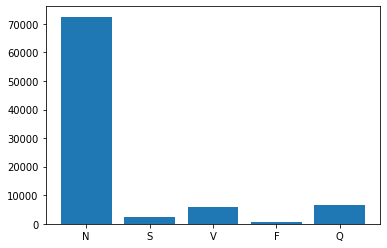

In [ ]:
labels = list(u.keys())
plt.bar(labels, www)

Finally, we are going to compare ECGs of one type to another with another graph. Draw one ECG of each type, one on top of the other. Bonus points for putting a title and caption on it! 😬

Text(0.5, 1.0, 'Different classes')

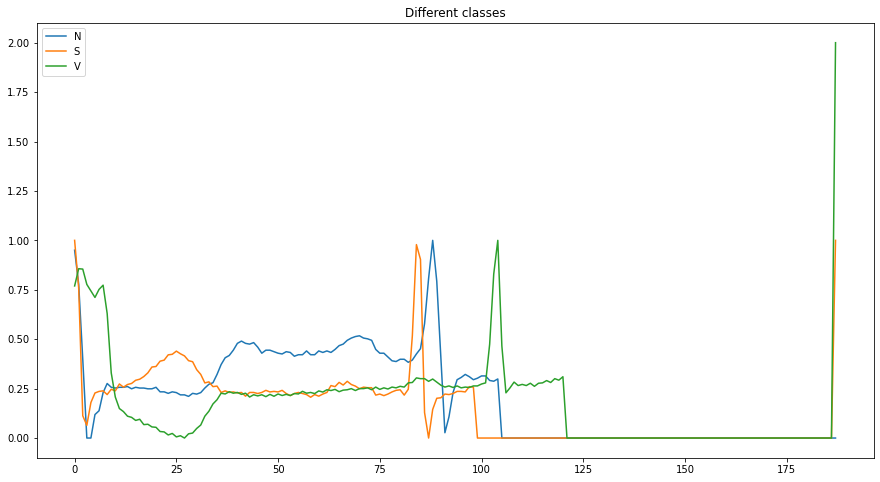

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(M[C0[20]], label='N')
plt.plot(M[C1[20]], label='S')
plt.plot(M[C2[10]], label='V')
plt.legend()
plt.title('Different classes')

## Let's prepare the data for the NN

As you already know, the best way to deal with categories is to use a OneHotEncoding. Transform Y to its OneHotEncoding. Remember that you will need to state the number of columns to be created based on the number of categories existing.

Hint: [to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

y_Hot = to_categorical(y, num_classes = 5)

Check that the OneHotEncoding has worked, that is, that for each column in the original Y 5 have been created, and that the values of the original and the OneHotEncoding correspond to each other.

In [ ]:
print(y.shape)
print(y_Hot.shape)
print(y[20000])
print(y_Hot[20000])

(87554,)
(87554, 5)
0.0
[1. 0. 0. 0. 0.]


Shuffle X and Y randomly (so that the tags still refer to the original examples, use [shuffle](https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html).

In [ ]:
from sklearn.utils import shuffle

X_shuffled, y_shuffled = shuffle(X, y_Hot)

Check that they have the same shape

In [ ]:
assert X_shuffled.shape == X.shape
assert y_shuffled.shape == y_Hot.shape

As an non-mandatory thing here, we can free up some memory by deleting the features we won't be using: X & y_Hot

In [ ]:
del X
del y_Hot

# Preparing the data for the NN:

To be able to enter the data in the model, we need each information point to be only inside the array (we cannot give an array as a value). Before we had the data structured like this:


$ X = [[a_1,a_2,a_3...,a_n],[b_1,b_2,b_3...,b_n]...[z_1,z_2,z_3,z_n] $


In order to use them we need to isolate each of these values, without eliminating their grouping for examples. See:

$ X = [[[a_1],[a_2],[a_3]...,[a_n]],[[b_1],[b_2],[b_3]...,[b_n]]...[[z_1],[z_2],[z_3],[z_n]] $

This is achieved using numpy's [expand_dims](https://docs.scipy.org/doc/numpy/reference/generated/numpy.expand_dims.html) function.

In [ ]:
X = np.expand_dims(X_shuffled, 2)

We're almost there! We only have to do a **train_test_split** and everything would be ready to implement the model.

In [ ]:
from sklearn.model_selection import train_test_split
#One line of code
X_train, X_test, y_train, y_test = train_test_split(X, y_shuffled, test_size=0.2)

## Models

In this part of the challenge we present you with a model that has already been created so that you can see how it works and play around with the different parameters.

First we import a few (only a few?😬) libraries to set up the model:

In [ ]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix

import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils

from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight

from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 
import itertools

What is the length of the input? (This will be the number of neurons we will have in the first layer.) How many neurons will we have in our last layer? We also need a batch_size if we want to train the neural network with SGD.

In [ ]:
signal_length = 187
batch_size = 1024
n_classes = 5

This is the neural network model. 

It has four layers, two of them hidden, and uses ReLU, sigmoid and softmax as activation functions. 

We will be using the **Squential** model. This is the simplest and most important way to define a NN that Keras has. It means that our NN is defined as a series of steps. This is typically appropiate for a plain stack of layers where each layer has exactly one input sensor and one output sensor.

For each of the layers of our NN, we need to define:
*   Conv1D
*   kernel_size
*   dropout
*   BatchNormalization
*  Activation function
*  MaxPooling1D



In [ ]:
model = Sequential() #The way we will create our NN

model.add(Conv1D(32, kernel_size=(5), input_shape=(signal_length, 1))) #1st step in our NN: flatting our data based on the size of the input. Here, this is the signal length.
model.add(Dropout(0.5)) 
model.add(BatchNormalization()) 
model.add(Activation('relu')) #what's the activation function?

model.add(Conv1D(32, (4))) #we will be creating a convolution of 1 dimension
model.add(Dropout(0.5)) 
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(MaxPooling1D(pool_size=(2)))

model.add(Conv1D(32, (4)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Conv1D(32, (4)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Flatten())

model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))


model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=Adadelta(),metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 183, 32)           192       
                                                                 
 dropout_10 (Dropout)        (None, 183, 32)           0         
                                                                 
 batch_normalization_8 (Batc  (None, 183, 32)          128       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 183, 32)           0         
                                                                 
 conv1d_9 (Conv1D)           (None, 180, 32)           4128      
                                                                 
 dropout_11 (Dropout)        (None, 180, 32)           0         
                                                      

To compile the model, .compile() is called. Here we specify which loss function we use, which optimizer and which metrics we want to keep for each epoch.

We could have chosen other loss functions like MSE or Log Loss. Check out the definition of Loss functions and the different alternatives [here](https://towardsdatascience.com/what-is-loss-function-1e2605aeb904)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy']) 

Now we **train the model** a number of epochs and with a specified batch_size. This returns us a history object with the accuracy of all the training phases. Remember:

*  epoch — represents the number of loops you go through your training set.
*  batch_size -represents the size of your training sample used to train the network during its learning process.




In [ ]:
history = model.fit(X_train, y_train,
                    epochs=75,  #Here we are telling the model to go over each training data 75 times
                    batch_size=batch_size,
                    verbose=1, 
                    validation_data=(X_test, y_test))

Epoch 1/75
69/69 [==============================] - 45s 592ms/step - loss: 0.7308 - accuracy: 0.8016 - val_loss: 0.7624 - val_accuracy: 0.8249
Epoch 2/75
69/69 [==============================] - 38s 558ms/step - loss: 0.4620 - accuracy: 0.8644 - val_loss: 0.8316 - val_accuracy: 0.8249
Epoch 3/75
69/69 [==============================] - 39s 568ms/step - loss: 0.3407 - accuracy: 0.9045 - val_loss: 0.8279 - val_accuracy: 0.8249
Epoch 4/75
69/69 [==============================] - 40s 575ms/step - loss: 0.2941 - accuracy: 0.9183 - val_loss: 0.8833 - val_accuracy: 0.8209
Epoch 5/75
69/69 [==============================] - 39s 565ms/step - loss: 0.2677 - accuracy: 0.9276 - val_loss: 0.9346 - val_accuracy: 0.8203
Epoch 6/75
69/69 [==============================] - 39s 563ms/step - loss: 0.2484 - accuracy: 0.9323 - val_loss: 0.9196 - val_accuracy: 0.8082
Epoch 7/75
69/69 [==============================] - 39s 560ms/step - loss: 0.2362 - accuracy: 0.9366 - val_loss: 0.7689 - val_accuracy: 0.8286

Access the historical accuracy of the model (with the history attribute).

The output should contain as many values as the input size multiplied per the amount of loops in the training

In [ ]:
history.history

{'accuracy': [0.8016361594200134,
  0.8644261360168457,
  0.9045300483703613,
  0.9182502031326294,
  0.9275587797164917,
  0.9322701692581177,
  0.9366246461868286,
  0.9399797320365906,
  0.9415644407272339,
  0.9446625709533691,
  0.9465613961219788,
  0.9488742351531982,
  0.9504733085632324,
  0.9516440033912659,
  0.9522864818572998,
  0.9553702473640442,
  0.9557985663414001,
  0.9563268423080444,
  0.9570264220237732,
  0.95799720287323,
  0.9586825370788574,
  0.9603101015090942,
  0.9609668254852295,
  0.960352897644043,
  0.960795521736145,
  0.962009072303772,
  0.9624230861663818,
  0.9632939696311951,
  0.9644789695739746,
  0.9648216366767883,
  0.9640649557113647,
  0.9644504189491272,
  0.9662350416183472,
  0.9651071429252625,
  0.9662492871284485,
  0.9660636782646179,
  0.9664206504821777,
  0.9668774604797363,
  0.9669060707092285,
  0.968219518661499,
  0.9678911566734314,
  0.968005359172821,
  0.9686335325241089,
  0.9689333438873291,
  0.969575822353363,
  0.96

How does the accuracy vary after each training loop?

Let's check if our model is overfitting. Draw a graph with the accuracy in train and in validation using the data from the history object.

Use `plt.plot()`

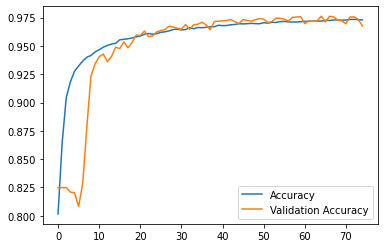

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

Repeat the same, but with the loss.

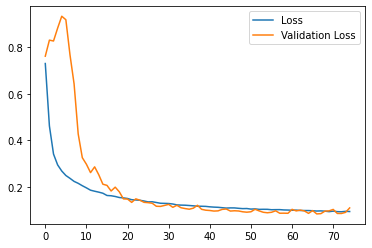

In [ ]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

Let's see what the X_test predicts.

In [ ]:
y_pred = model.predict(X_test, batch_size=1000)

What is the dimension of the prediction y_pred?

In [ ]:
y_pred.shape

(17511, 5)

For a given iteration, compare the prediction to the expected value using a bar graph.



[0. 0. 0. 0. 1.]


<BarContainer object of 5 artists>

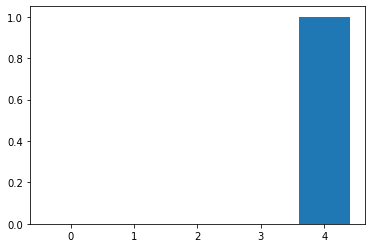

In [ ]:
print(y_test[6])
plt.bar(range(n_classes), height=y_pred[6])

Does the model pose a single possibility or probabilities when estimating the category?

> 

We have already trained our model and we can check how good it is and whether it has been overfitted. The following code is a good way to generate a model report. After that, we are showing a confusion matrix:  snippet generates a model report, and the next one a confusion matrix. Both are good ways to evaluate your model

In [ ]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     14444
           1       0.98      0.58      0.73       502
           2       0.98      0.85      0.91      1145
           3       0.63      0.26      0.37       146
           4       0.99      0.96      0.97      1274

    accuracy                           0.97     17511
   macro avg       0.91      0.73      0.79     17511
weighted avg       0.97      0.97      0.96     17511



Normalized confusion matrix


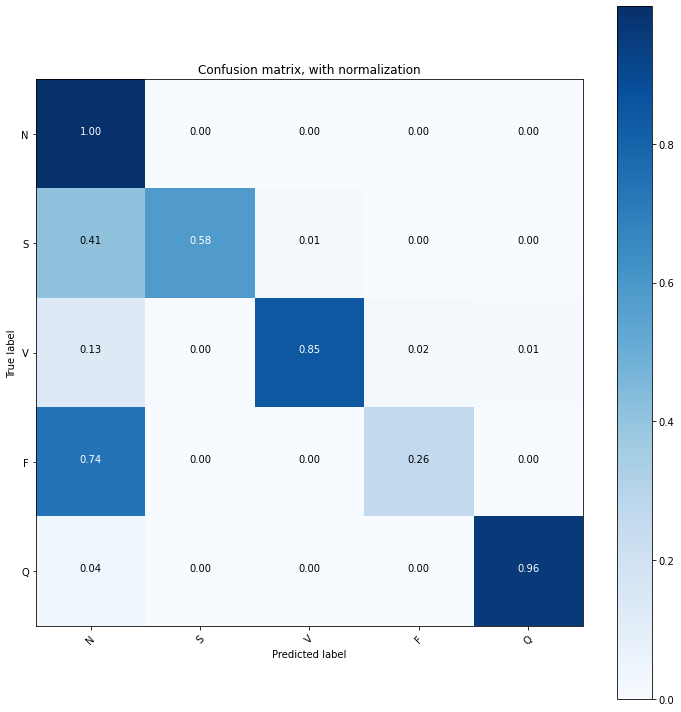

In [ ]:
#Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],
                      title='Confusion matrix, with normalization',
                      normalize=True)
plt.show()

**Questions:**
- If we take everything that is not normal as positive, does the model err more in false positives or in false negatives?
- Which category generates the greatest error?
- Is there overfitting?
- How does batch_size affect training?

Now it's your turn to improve the model. Try other optimizers, change the cost function, go crazy with the batch_size... The paper at the beginning may give you some clues. As always, whoever has the best score, has a prize!